# 1 LIBRERÍAS NECESARIAS

In [1]:
!pip install missingno missingpy missforest statsmodels

"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from missforest import MissForest
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# 2 CARGAR EL DATA FRAME

## 2.1 CREAR EL DATA FRAME CON PANDAS

In [3]:
df_sin_limpiar = pd.read_csv("C:\\Users\\ingen\\OneDrive\\Escritorio\\CURSO DE DATA SCIENCE\\ULTIMO PROYECTO\\cathycaz-intro-ml\\data\\raw\\bank-marketing-campaign-data.csv", sep=";")
# CON ESTE CÓDIGO SE IMPORTA EL DOCUMENTO CON FORMATO CSV
df_sin_limpiar.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2.2 MOSTRAR TODAS LAS COLUMNAS DEL DATA FRAME

In [4]:
pd.set_option('display.max_columns', None) # ESTO SIRVE PARA QUE ME MUESTRE TODAS LAS COLUMNAS CUANDO UN DATAFRAME ES MUY ANCHO O CON MUCHAS COLUMNAS 
# CON EL (None) LE DIGO QUE ME MUESTRE TODAS LAS COLUMNAS SIN LIMITACIÓN
df_sin_limpiar.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2.3 MOSTRAR INFORMACIÓN DEL DATA FRAME

In [5]:
df_sin_limpiar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 3 CRIBADO MANUAL 

## 3.1 DEFINIR EL OBJETIVO: 

EL OBJETIVO ES CREAR UN ALGORITMO DE CLASIFICACIÓN QUE AYUDE A PREDECIR SI UN CLIENTE CONTRATARÁ O NO UN DEPÓSITO A LARGO PLAZO.

## 3.2 CREAR UNA COPIA DEL DATA FRAME, PARA TRABAJAR SOBRE ESA COPIA SIN MODIFICAR LA ORIGINAL

In [6]:
df = df_sin_limpiar.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3.3 COMPROBACIÓN DE CUANTOS VALORES ÚNICOS HAY EN CADA COLUMNA

In [7]:
unicos = df.nunique()
unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

## 3.4 COMPROBACIÓN CUÁNTOS VALORES ÚNICOS IGUAL A 1 HAY POR CADA COLUMNA 

In [8]:
df[unicos[unicos==1].index]

""
0
1
2
3
4
...
41183
41184
41185
41186


CONCLUSIÓN:  NO HAY VALORES ÚNICOS IGUAL A 1 EN NINGUNA COLUMNA!!

## 3.5 COMPROBACIÓN DE DATOS DUPLICADOS EN FILAS

In [9]:
df.duplicated().sum()

np.int64(12)

CONCLUSIÓN: TENEMOS 12 FILAS DUPLICADOS EN EL DATAFRAME

In [10]:
df.duplicated(keep=False) 

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

NOTAS IMPORTANTES!!

Este método devuelve una Serie booleana (una columna de valores True/False) con el mismo índice que el DataFrame original:

True: Indica que la fila está duplicada (aparece más de una vez)

False: Indica que la fila es única (no tiene duplicados)

## 3.6 ELIMINAMOS FILAS DUPLICADAS 

In [11]:
df.drop_duplicates(keep='first', inplace=True)

NOTAS IMPORTANTES!! 

El parámetro keep acepta tres valores posibles:


'first' : Conserva la primera ocurrencia de cada fila duplicada

'last' : Conserva la última ocurrencia de cada fila duplicada

False : Elimina todas las filas duplicadas (no conserva ninguna)

### 3.6.1 COMPROBAR QUE HEMOS ELIMINADO LOS DUPLICADOS

In [12]:
df.duplicated().sum()

np.int64(0)

CONCLUSIÓN:  YA NO TENEMOS FILAS DUPLICADAS EN EL DATA FRAME

## 3.7 COMPROBACIÓN DE DATOS DUPLICADOS EN COLUMNAS CON LA TRANSPUESTA

In [13]:
df.T.duplicated().sum()

np.int64(0)

CONCLUSIÓN: NO HAY COLUMNAS QUE TENGAN EXACTAMENTE LOS MISMOS DATOS

## 3.8 VERIFICACIÓN DE DATOS FALTANTES EN COLUMNAS

In [14]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
df.isnull().mean()*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

CONCLUSIÓN: ESTO ME ARROJA QUE NO HAY DATOS FALTANTES, PERO NO PODEMOS CONCLUIR DE MANERA 100 % SEGURA QUE NO HAY DATOS FALTANTES SOLO APLICANDO ISNULL, YA QUE ESTE DATA FRAME TIENE DATOS DE TIPO OBJECT Y PUEDEN EXISTIR VALORES FALTANTES ENMASCARADOS EN FORMA DE TEXTO, DEBIDO A QUE ISSNULL SOLO DETECTA VALORES NaN O None. ENTONCES LO CORRECTO ES ESTUDIAR MAS A FONDO ESTE DATA FRAME:

POSIBLES CASOS DE DATOS ENMASCARADOS:

- "unknown" (muy común en datos bancarios)
- "?" 
- "N/A", "n/a", "NA"
- Espacios vacíos o cadenas vacías ""

## 3.9 ESTUDIAMOS A FONDO SI REALMENTE NO HAY DATOS FALTANTES!!

### 3.9.1 VISUALIZAR COLUMNAS CON VALORES DE TIPO OBJECT

In [16]:
df.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


### 3.9.2 ANÁLISIS DETALLADO DE CADA COLUMNA DE TEXTO PARA ENCONTRAR POSIBLES VALORES ENMASCARADOS

In [17]:
# Ahora vamos a ver que valores únicos tiene cada columna de texto. Esto nos ayudará a identificar valores sospechosos.
for columna in df.select_dtypes(include='object').columns: # → Recorre todas las columnas de texto
    print(f"\n{'-'*25}")
    print(f"COLUMNA: {columna}")
    print(f"{'-'*25}")
    print(df[columna].value_counts()) # Muestra cada valor único y cuántas veces aparece, ordenado de mayor a menor frecuencia
    print(f"\nTotal de valores únicos: {df[columna].nunique()}") # → Cuenta cuántos valores diferentes hay en total


-------------------------
COLUMNA: job
-------------------------
job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Total de valores únicos: 12

-------------------------
COLUMNA: marital
-------------------------
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

Total de valores únicos: 4

-------------------------
COLUMNA: education
-------------------------
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

Total de valores únicos: 8

-------------------------


CONCLUSIÓN: DE ACUERDO AL ÁNALISIS REALIZADO POR CADA COLUMNA DE TIPO OBJECT PODEMOS CONCLUIR QUE LOS ÚNICOS VALORES SOSPECHOSO COMO FALTANTE QUE DEBEMOS ESTUDIAR ES "unknown" Y "nonexistent"

### 3.9.3 DETERMINAR Y CONTABILIZAR COLUMNAS CON VALORES "unknown" y "nonexistent"

In [18]:
# ITERAMOS SOLO POR LAS COLUMNAS QUE TIENEN DATOS TIPO 'OBJECT' (TEXTO)
for columna in df.select_dtypes(include='object').columns: # → Filtra solo las columnas de texto (las numéricas no pueden tener "unknown")
    # CONTAMOS CUÁNTOS VALORES "unknown" HAY EN CADA COLUMNA
    count_unknown = (df[columna] == 'unknown').sum() # → Cuenta cuántas veces aparece exactamente "unknown" en esa columna

    
    if count_unknown > 0:
        # SI HAY "unknown", MOSTRAMOS CUÁNTOS
        porcentaje = (count_unknown / len(df)) * 100
        print(f"{columna}: {count_unknown} valores 'unknown' ({porcentaje:.2f}%)")

job: 330 valores 'unknown' (0.80%)
marital: 80 valores 'unknown' (0.19%)
education: 1730 valores 'unknown' (4.20%)
default: 8596 valores 'unknown' (20.88%)
housing: 990 valores 'unknown' (2.40%)
loan: 990 valores 'unknown' (2.40%)


In [19]:
# ITERAMOS SOLO POR LAS COLUMNAS QUE TIENEN DATOS TIPO 'OBJECT' (TEXTO)
for columna in df.select_dtypes(include='object').columns: # → Filtra solo las columnas de texto (las numéricas no pueden tener "unknown")
    # CONTAMOS CUÁNTOS VALORES "nonexistent" HAY EN CADA COLUMNA
    count_unknown = (df[columna] == 'nonexistent').sum() # → Cuenta cuántas veces aparece exactamente "nonexistent" en esa columna

    
    if count_unknown > 0:
        # SI HAY "nonexistent", MOSTRAMOS CUÁNTOS
        porcentaje = (count_unknown / len(df)) * 100
        print(f"{columna}: {count_unknown} valores 'nonexistent' ({porcentaje:.2f}%)")

poutcome: 35551 valores 'nonexistent' (86.34%)


### 3.9.4 GRÁFICAMOS Y CONVERTIMOS EN NAN LOS 'unknown', 'nonexistent' PARA VISUALIZARLO MEJOR 

age                0.00
job                0.80
marital            0.19
education          4.20
default           20.88
housing            2.40
loan               2.40
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome          86.34
emp.var.rate       0.00
cons.price.idx     0.00
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
y                  0.00
dtype: float64


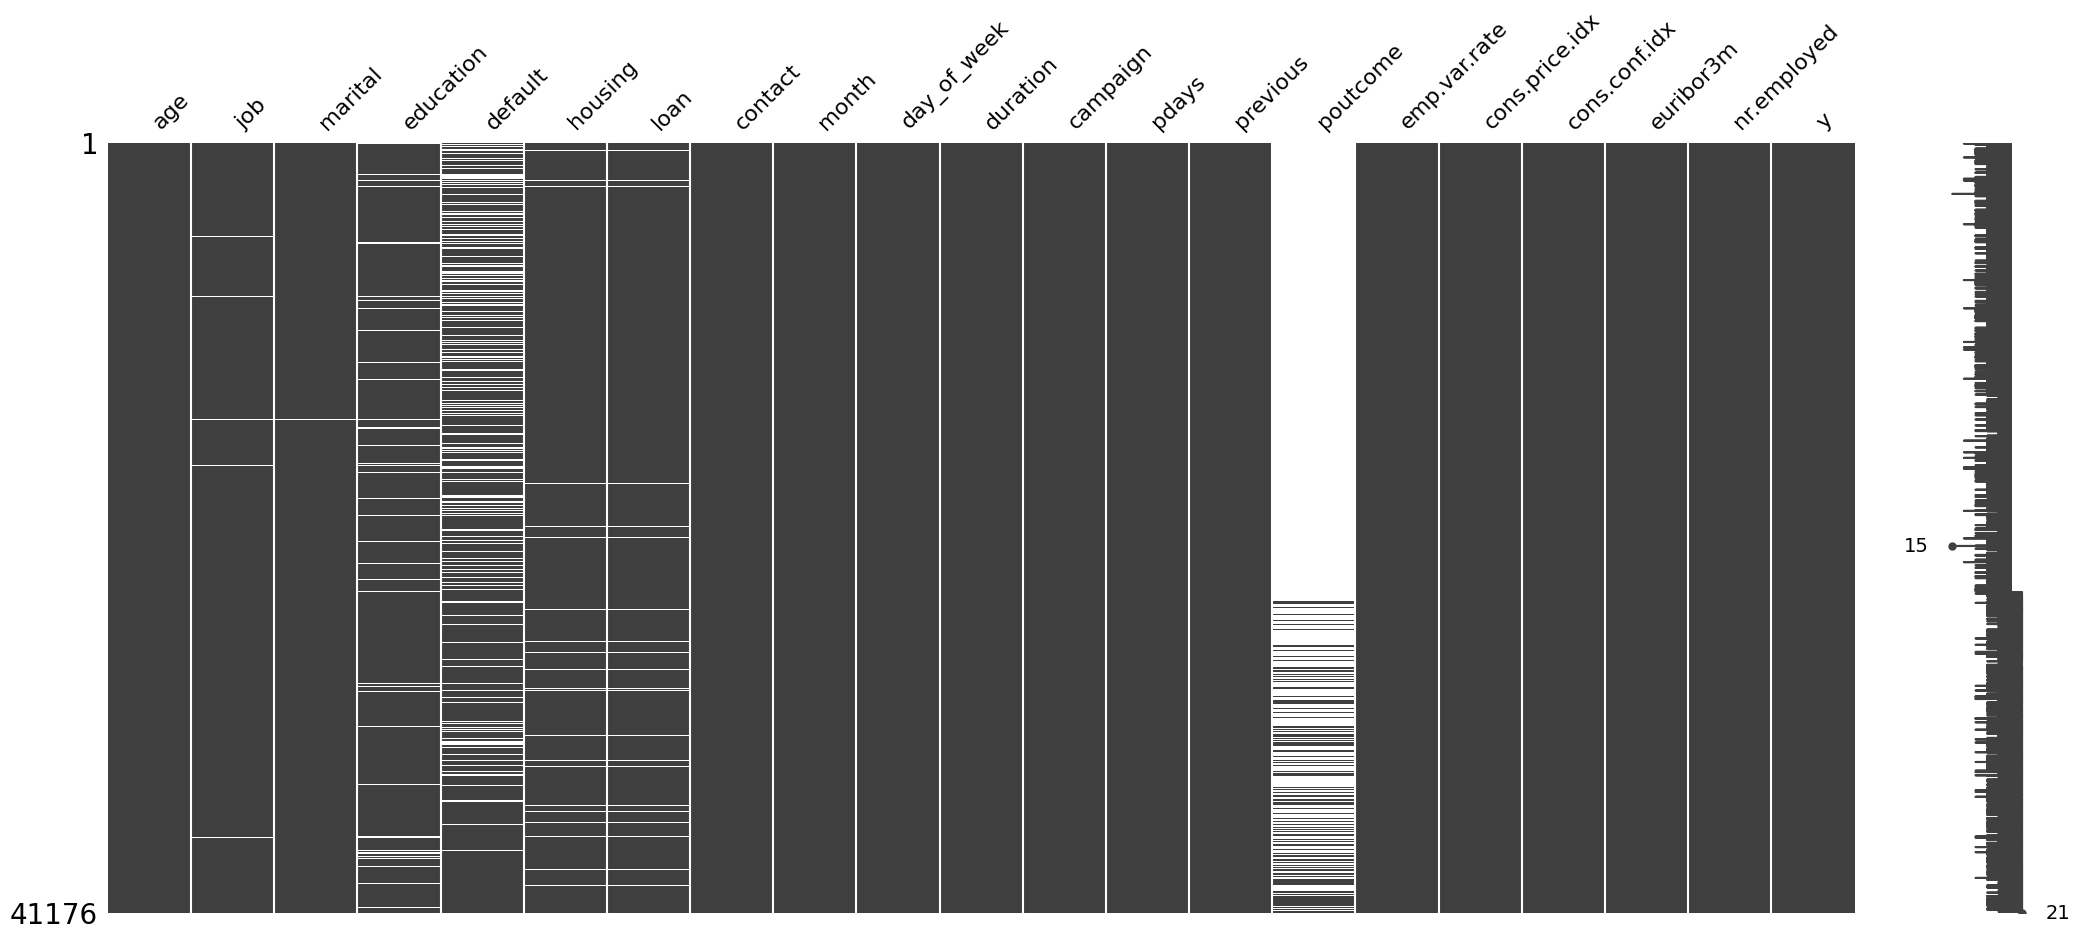

In [20]:
df = df.replace(['unknown', 'nonexistent'], np.nan)
print((df.isnull().sum()* 100 / len(df)).round(2))
msno.matrix(df)
plt.show()

### 3.9.5 VERIFICAR DATOS FALTANTES EN FILAS MAYORES AL 40% 

In [21]:
df_filas_faltantes = (df.T.isnull().sum()* 100 / len(df)).round(2)
print(df_filas_faltantes[df_filas_faltantes > 0.40])

Series([], dtype: float64)


CONCLUSIÓN: NO HAY FILAS CON UN NUMERO MAYOR A 40% DE DATOS FALTANTES

### 3.9.6 VERIFICAR SI AHORA SE CONTABILIZAN LOS DATOS FALTANTES EN COLUMNAS

In [22]:
df.isna().sum()

age                   0
job                 330
marital              80
education          1730
default            8596
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          35551
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

CONCLUSIÓN: AHORA SI ME CUENTA CORRECTAMENTE LOS DATOS FALTANTES DESPUÉS DE CONVERTIRLOS EN NAN

### 3.9.7 NOTA ADICIONAL: BÚSQUEDA DE MÚLTIPLES VALORES ENMASCARADOS (EN ESTE CASO NO ES NECESARIO PERO COMO APORTE GENERAL GUARDAMOS ESTE CÓDIGO QUE FUNCIONA DE MANERA MAS AMPLIA)

In [23]:
# LISTA DE VALORES QUE PUEDEN REPRESENTAR DATOS FALTANTES
valores_faltantes = ['unknown', 'Unknown', 'UNKNOWN', '?', 'N/A', 'n/a', 'NA', 
                     'none', 'None', 'NONE', 'null', 'NULL', '', ' ', 'nonexistent']

# CREAR UN DICCIONARIO PARA GUARDAR LOS RESULTADOS
resultados = {}

# BUSCAR EN TODAS LAS COLUMNAS DE TEXTO
for columna in df.select_dtypes(include='object').columns:
    encontrados = []
    
    for valor in valores_faltantes:
        count = (df[columna] == valor).sum()
        if count > 0:
            porcentaje = (count / len(df)) * 100
            encontrados.append(f"'{valor}': {count} ({porcentaje:.2f}%)")
    
    if encontrados:
        resultados[columna] = encontrados

# MOSTRAR LOS RESULTADOS
if resultados:
    print("VALORES ENMASCARADOS ENCONTRADOS:\n")
    for columna, valores in resultados.items():
        print(f"{columna}:")
        for valor in valores:
            print(f"   - {valor}")
else:
    print("NO SE ENCONTRARON VALORES ENMASCARADOS COMO FALTANTES")

NO SE ENCONTRARON VALORES ENMASCARADOS COMO FALTANTES


CONCLUSIÓN: EN LA COMPROBACIÓN GENERAL QUE DEJE COMO NOTA PARA MI NOTEBOOK TAMBIÉN SE VERIVIFA QUE YA NO HAY VALORES FALTANTES ENMASCARADOS PORQUE LOS HEMOS CONVERTIDOS EN NAN!!

## 3.10 ESTUDIAMOS LA VARIABLE DEFAULT YA QUE TAMBIEN TIENE UN PORCENTAJE ALTO DE VALORES FALTANTES A VER QUE SUCEDE


In [24]:
df['default'].replace({1: "No",  0:  "Si"}).value_counts()

default
no     32577
yes        3
Name: count, dtype: int64

In [25]:
df['default'].nunique()

2

In [26]:
df = df.drop('default', axis=1)
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


CONCLUSION: ESTA COLUMNA SOLO TOMA 2 VALORES DISTINTOS, DE LOS CUALES 32577 APORTAN EL MISMO VALOR, QUE ADEMAS DICEN QUE NO TIENEN CRÉDITO ACTUALMENT, EL 20% DE LOS VALORES FALTAN Y SOLO 3 SON VALORES DISTINTOS. POR TANTO TOMAMOS LA DECISIÓN DE ELIMINARLA

## 3.11 ELIMINAMOS LA COLUMNA CON EL 86% DE LOS DATOS FALTANTES 

In [27]:
df = df.drop('poutcome', axis=1)
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


## 3.12 ESTUDIAMOS A FONDO SI REALMENTE NO HAY DATOS FALTANTES TIPO NÚMERICO!!

### 3.12.1 VISUALIZAR COLUMNAS CON VALORES DE TIPO INT, FLOAT

In [28]:
df.select_dtypes(include=['int64', 'float64'])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [29]:
df.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


CONCLUSIÓN: NOTAMOS ALGO EXTRAÑO EN LOS DATOS DE 'pdays'. HAREMOS UN GRÁFICO PARA ANALIZARLO 

### 3.12.2 GRÁFICA DE LA VARIABLE 'pdays'

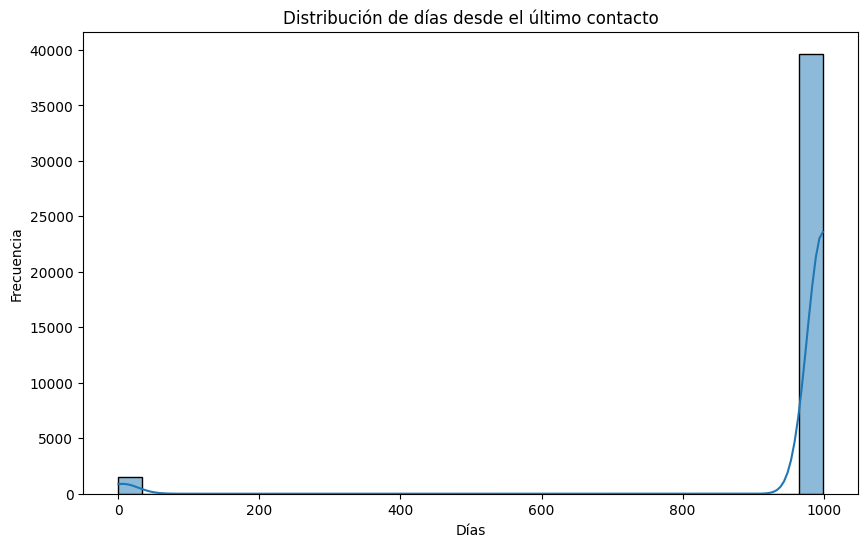

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="pdays", bins=30, kde=True)
plt.title('Distribución de días desde el último contacto')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.show()

### 3.12.3 CONVERTIR VALORES'999' A NAN

In [31]:
# Reemplazamos y visualizamos categorias anteriores por NaN
df["pdays"].replace(999, np.nan, inplace=True)

C:\Users\ingen\AppData\Local\Temp\ipykernel_12884\164245507.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["pdays"].replace(999, np.nan, inplace=True)


### 3.12.4 GRÁFICAMOS VALORES FALTANTES EN 'pdays' PARA VISLUALIZARLOS MEJOR

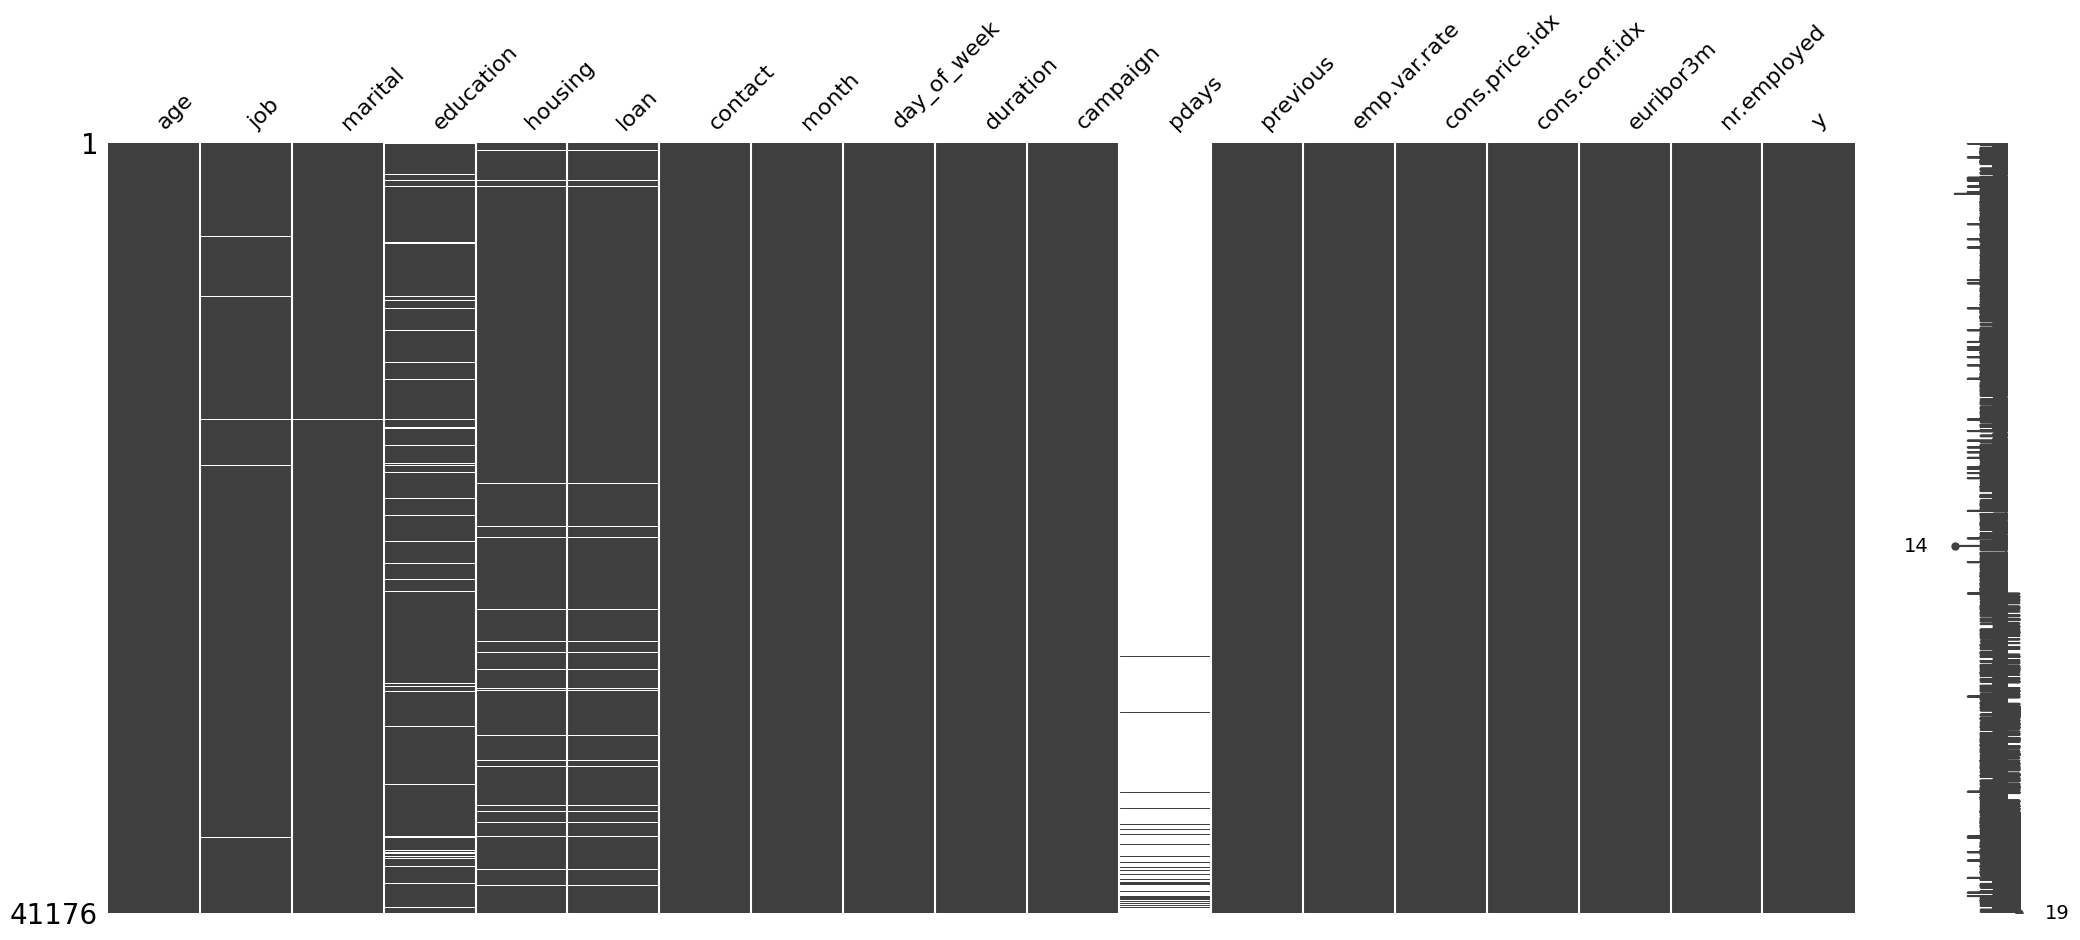

In [32]:
msno.matrix(df)
plt.show()

### 3.12.5  ELIMINAR COLUMNA 'pdays'

In [33]:
df.drop('pdays', axis=1, inplace=True)
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no


# 4 CATEGORIZAR LAS VARIABLES TIPO OBJECT

## 4.1 VIZUALIZACIÓN DE COLUMNAS TIPO OBJECT QUE DEBEMOS CATEGORIZAR

In [34]:
df_categoricas = df.select_dtypes(include='object').columns.tolist()
df_categoricas # la ponemos en una variable para trabajar sobre ella sin afectar al dataframe original

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'y']

## 4.2 VISUALIZAR VALORES ÚNICOS DE CADA COLUMNA DE TIPO OBJECT

In [35]:
# VER VALORES ÚNICOS Y FRECUENCIAS DE CADA COLUMNA
for col in df_categoricas:
    print(f"\n{'='*30}")
    print(f"COLUMNA: {col.upper()}")
    print(f"{'='*30}")
    
    # Valores únicos
    valores = df[col].dropna().unique() # → Elimina los NaN antes de obtener los valores únicos
    print(f"Número de categorías: {len(valores)}")
    print(f"Valores: {valores}\n")



COLUMNA: JOB
Número de categorías: 11
Valores: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']


COLUMNA: MARITAL
Número de categorías: 3
Valores: ['married' 'single' 'divorced']


COLUMNA: EDUCATION
Número de categorías: 7
Valores: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']


COLUMNA: HOUSING
Número de categorías: 2
Valores: ['no' 'yes']


COLUMNA: LOAN
Número de categorías: 2
Valores: ['no' 'yes']


COLUMNA: CONTACT
Número de categorías: 2
Valores: ['telephone' 'cellular']


COLUMNA: MONTH
Número de categorías: 10
Valores: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


COLUMNA: DAY_OF_WEEK
Número de categorías: 5
Valores: ['mon' 'tue' 'wed' 'thu' 'fri']


COLUMNA: Y
Número de categorías: 2
Valores: ['no' 'yes']



## 4.3 CATEGORIZAR JOB CON TARGET ENCODING (CATEGORIA NOMINAL)

### 4.3.0 CONVERTIR 'y' A VALORES NUMÉRICOS PARA TARGET ENCODING

In [36]:
# Convertir 'y' a valores numéricos temporalmente para calcular tasas de conversión
# yes = 1 (cliente contrató), no = 0 (cliente no contrató)
df['y_numeric'] = df['y'].map({'yes': 1, 'no': 0})

# Verificar la conversión
print("Conversión de 'y' a valores numéricos:")
print(df[['y', 'y_numeric']].value_counts())
print(f"\nTipo de dato y_numeric: {df['y_numeric'].dtype}")

Conversión de 'y' a valores numéricos:
y    y_numeric
no   0            36537
yes  1             4639
Name: count, dtype: int64

Tipo de dato y_numeric: int64


### 4.3.1 MÉTODO TARGET ECODING

In [37]:
# TARGET ENCODING: Asigna valores basados en la tasa de conversión de 'y' para cada categoría de 'job'
# Esto crea automáticamente un orden basado en la probabilidad de que el cliente contrate el depósito a plazo según su trabajo.

# Calcular la tasa de conversión por cada tipo de job (usando y_numeric)
target_encoding_job = df.groupby('job')['y_numeric'].mean().sort_values() # → Media de y_numeric por job

print("TARGET ENCODING PARA JOB (Tasa de conversión 'yes'):")
print(target_encoding_job)
print(f"\n{'='*60}")

# Crear ranking basado en target encoding (mayor tasa = mayor ranking)
ranking_ml = {job: rank+1 for rank, job in enumerate(target_encoding_job.index)} # → Asigna un ranking basado en la posición en target_encoding_job

print("\nRANKING ML (basado en efectividad de conversión):")
for job, rank in sorted(ranking_ml.items(), key=lambda x: x[1], reverse=True):
    tasa = target_encoding_job[job]
    print(f"Rank {rank}: {job:<20} → Tasa conversión: {tasa:.2%}")

TARGET ENCODING PARA JOB (Tasa de conversión 'yes'):
job
blue-collar      0.068951
services         0.081422
entrepreneur     0.085165
housemaid        0.100000
self-employed    0.104856
technician       0.108325
management       0.112175
admin.           0.129667
unemployed       0.142012
retired          0.252619
student          0.314286
Name: y_numeric, dtype: float64


RANKING ML (basado en efectividad de conversión):
Rank 11: student              → Tasa conversión: 31.43%
Rank 10: retired              → Tasa conversión: 25.26%
Rank 9: unemployed           → Tasa conversión: 14.20%
Rank 8: admin.               → Tasa conversión: 12.97%
Rank 7: management           → Tasa conversión: 11.22%
Rank 6: technician           → Tasa conversión: 10.83%
Rank 5: self-employed        → Tasa conversión: 10.49%
Rank 4: housemaid            → Tasa conversión: 10.00%
Rank 3: entrepreneur         → Tasa conversión: 8.52%
Rank 2: services             → Tasa conversión: 8.14%
Rank 1: blue-collar    

### 4.3.2 APLICAR TARGET ENCODING A LA COLUMNA JOB

In [38]:
# Aplicar el ranking ML a la columna job
df['job_ml_encoded'] = df['job'].map(ranking_ml)

# Verificar la codificación
print("COMPARACIÓN: Job Original vs Target Encoding ML:")
comparacion = df[['job', 'job_ml_encoded']].drop_duplicates().sort_values('job_ml_encoded', ascending=False)
print(comparacion)

# Mostrar las primeras filas del DataFrame
print("\n" + "="*60)
print("PRIMERAS FILAS CON JOB CODIFICADO:")
df[['job', 'job_ml_encoded', 'y']].head(10)

COMPARACIÓN: Job Original vs Target Encoding ML:
               job  job_ml_encoded
205        student            11.0
15         retired            10.0
20      unemployed             9.0
3           admin.             8.0
19      management             7.0
8       technician             6.0
27   self-employed             5.0
0        housemaid             4.0
41    entrepreneur             3.0
1         services             2.0
7      blue-collar             1.0
29             NaN             NaN

PRIMERAS FILAS CON JOB CODIFICADO:


,job,job_ml_encoded,y
0,housemaid,4.0,no
1,services,2.0,no
2,services,2.0,no
3,admin.,8.0,no
4,services,2.0,no
5,services,2.0,no
6,admin.,8.0,no
7,blue-collar,1.0,no
8,technician,6.0,no
9,services,2.0,no


### 4.3.3 TEST DE COMPROBACIÓN DE MI TARGET ECODING PARA SABER SI ES CONFIABLE 

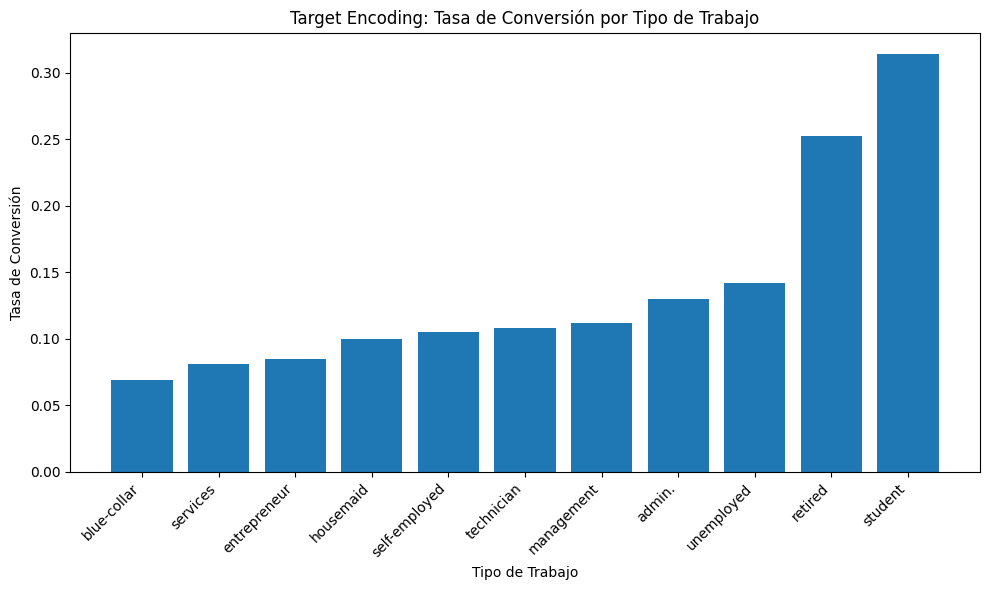

In [39]:
# Gráfico sencillo para demostrar que el Target Encoding funciona
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(target_encoding_job.index, target_encoding_job.values)
plt.xlabel('Tipo de Trabajo')
plt.ylabel('Tasa de Conversión')
plt.title('Target Encoding: Tasa de Conversión por Tipo de Trabajo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

CONCLUSIÓN: COMO PODEMOS VER CADA TIPO DE TRABAJO TIENE UNA TASA DE CONVERSIÓN DIFERENTE ESTO DEMUESTRA QUE EL TARGET ENCODING CAPTURA LA RELACIÓN ENTRE TRABAJO Y EL TARGET

### 4.3.4 IGUALAR LA COLUMNA 'job' y job_ml_encoded'

In [40]:
df['job']=df['job_ml_encoded']
df.head(3)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric,job_ml_encoded
0,56,4.0,married,basic.4y,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,4.0
1,57,2.0,married,high.school,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,2.0
2,37,2.0,married,high.school,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0,2.0


### 4.3.5 ELIMINAR LA COLUMNA job_ml_encoded Y CONVERTIR LA NUEVA COLUMNA JOB CON LOS NUEVOS VALORES CATEGORIZADOS

In [41]:
df.drop('job_ml_encoded', axis=1, inplace=True)
df.head(3)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric
0,56,4.0,married,basic.4y,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,2.0,married,high.school,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,2.0,married,high.school,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0


## 4.4 CATEGORIZAR LA VARIABLE EDUCATION CON MÉTODO ECODING ORDINAL MANUAL (CATEGORIA NOMINAL)

### 4.4.1 APLICAR EL MÉTODO ORDINAL ECODING MANUAL

In [42]:
# Datos Education
mapeo_education = {
    'illiterate': 'Sin Educación Formal',
    'basic.4y': 'Educación Básica',
    'basic.6y': 'Educación Básica',
    'basic.9y': 'Educación Básica',
    'high.school': 'Educación Media',
    'professional.course': 'Educación Superior',
    'university.degree': 'Educación Superior'
}

# Diccionario de mapeo de categoría a rango de importancia bancaria
# Mayor nivel educativo = Mayor capacidad de ingreso/estabilidad financiera
mapeo_rangos_education = {
    'Educación Superior': 4,        # Universidad o curso profesional
    'Educación Media': 3,            # High school
    'Educación Básica': 2,           # 4-9 años
    'Sin Educación Formal': 1        # Illiterate
}

# Aplicar mapeos
df['categoria_education'] = df['education'].map(mapeo_education)
df['rango_education'] = df['categoria_education'].map(mapeo_rangos_education)

# Mostrar resultado
print("CATEGORIZACIÓN DE EDUCATION:\n")
resultado = df[['education', 'categoria_education', 'rango_education']].drop_duplicates().sort_values(by='rango_education', ascending=False)
print(resultado)

CATEGORIZACIÓN DE EDUCATION:

                education   categoria_education  rango_education
6     professional.course    Educación Superior              4.0
25      university.degree    Educación Superior              4.0
1             high.school       Educación Media              3.0
3                basic.6y      Educación Básica              2.0
0                basic.4y      Educación Básica              2.0
5                basic.9y      Educación Básica              2.0
5393           illiterate  Sin Educación Formal              1.0
7                     NaN                   NaN              NaN


### 4.4.2 REEMPLAZAR COLUMNA EDUCATION CON LOS NUEVOS VALORES CATEGORIZADOS Y ELIMINAR LAS COLUMNAS EXTRAS CREADAS

In [43]:
# Reemplazar la columna education con los rangos numéricos
df['education'] = df['rango_education']
df.drop(['categoria_education', 'rango_education'], axis=1, inplace=True)
df.head(3)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric
0,56,4.0,married,2.0,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,2.0,married,3.0,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,2.0,married,3.0,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0


## 4.5 CATEGORIZAR LA VARIABLE MONTH CON MÉTODO ECODING ORDINAL MANUAL (CATEGORIA NOMINAL)

In [44]:
# CATEGORIZACIÓN DE MONTH SEGÚN VALOR BANCARIO
# Diciembre tiene el valor más alto por ser temporada de bonos, aguinaldos y gastos navideños

mapeo_month = {
    'jan': 1,   # Enero - Inicio de año, después de gastos navideños
    'feb': 2,   # Febrero - Inicio de recuperación
    'mar': 3,   # Marzo - Impuestos
    'apr': 4,   # Abril - Post impuestos
    'may': 5,   # Mayo - Primavera
    'jun': 6,   # Junio - Mitad de año
    'jul': 7,   # Julio - Vacaciones de verano
    'aug': 8,   # Agosto - Fin de verano
    'sep': 9,   # Septiembre - Regreso a clases
    'oct': 10,  # Octubre - Preparación fin de año
    'nov': 11,  # Noviembre - Pre-navidad
    'dec': 12   # Diciembre - Bonos, aguinaldos, mayor capacidad de inversión
}

# Aplicar mapeo
df['month_categorizado'] = df['month'].map(mapeo_month)

# Mostrar resultado
print("CATEGORIZACIÓN DE MONTH:\n")
resultado = df[['month', 'month_categorizado']].drop_duplicates().sort_values(by='month_categorizado', ascending=False)
print(resultado)


CATEGORIZACIÓN DE MONTH:

      month  month_categorizado
27680   dec                  12
24064   nov                  11
23997   oct                  10
37887   sep                   9
18822   aug                   8
12137   jul                   7
7763    jun                   6
0       may                   5
27972   apr                   4
27690   mar                   3


### 4.5.1 REEMPLAZAR COLUMNA MONTH CON LOS NUEVOS VALORES CATEGORIZADOS Y ELIMINAR LA VARIABLE EXTRA CREADA

In [45]:
# Reemplazar la columna month con los valores numéricos
df['month'] = df['month_categorizado']
df.drop('month_categorizado', axis=1, inplace=True)
df.head(3)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric
0,56,4.0,married,2.0,no,no,telephone,5,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,2.0,married,3.0,no,no,telephone,5,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,2.0,married,3.0,yes,no,telephone,5,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0


## 4.6 CATEGORIZAR LA VARIABLE DAY OF WEEK CON MÉTODO ECODING ORDINAL MANUAL (CATEGORIA NOMINAL)

In [46]:
# CATEGORIZACIÓN DE DAY_OF_WEEK SEGÚN VALOR BANCARIO
# Viernes tiene el valor más alto (día de pago, mayor disposición para productos bancarios)

mapeo_day_of_week = {
    'mon': 1,   # Lunes - Inicio de semana, menos disposición
    'tue': 2,   # Martes - Aún lejos del día de pago
    'wed': 3,   # Miércoles - Mitad de semana
    'thu': 4,   # Jueves - Acercándose al fin de semana
    'fri': 5    # Viernes - Día de pago, mayor disposición a productos financieros
}

# Aplicar mapeo
df['day_of_week_categorizado'] = df['day_of_week'].map(mapeo_day_of_week)

# Mostrar resultado
print("CATEGORIZACIÓN DE DAY_OF_WEEK:\n")
resultado = df[['day_of_week', 'day_of_week_categorizado']].drop_duplicates().sort_values(by='day_of_week_categorizado', ascending=False)
print(resultado)

CATEGORIZACIÓN DE DAY_OF_WEEK:

     day_of_week  day_of_week_categorizado
1579         fri                         5
1146         thu                         4
756          wed                         3
360          tue                         2
0            mon                         1


### 4.6.1 REEMPLAZAR COLUMNA DAY_OF_WEEK CON LOS NUEVOS VALORES CATEGORIZADOS Y ELIMINAR LA VARIABLE EXTRA CREADA

In [47]:
# Reemplazar la columna day_of_week con los valores numéricos
df['day_of_week'] = df['day_of_week_categorizado']
df.drop('day_of_week_categorizado', axis=1, inplace=True)
df.head(3)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_numeric
0,56,4.0,married,2.0,no,no,telephone,5,1,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,2.0,married,3.0,no,no,telephone,5,1,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,2.0,married,3.0,yes,no,telephone,5,1,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no,0


## 4.7 VERIFICACIÓN DEL CAMBIO DE CATEGORIA DE LAS VARIABLES TRABAJADAS

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  float64
 2   marital         41096 non-null  object 
 3   education       39446 non-null  float64
 4   housing         40186 non-null  object 
 5   loan            40186 non-null  object 
 6   contact         41176 non-null  object 
 7   month           41176 non-null  int64  
 8   day_of_week     41176 non-null  int64  
 9   duration        41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  previous        41176 non-null  int64  
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  euribor3m       41176 non-null  float64
 16  nr.employed     41176 non-null  float64
 17  y               41176 non-null  obje

## 4.8 CATEGORIZAR EL RESTO DE LAS VARIABLES CON ON HOT ECODING MANUALMENTE (CATEGORIA NOMINAL)

In [49]:
# Separar variables categóricas y numéricas
categoricas = df.select_dtypes(include='object').columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Convertir categóricas a números temporalmente
df_temp = df.copy()
for col in categoricas:
    df_temp[col] = df_temp[col].astype('category').cat.codes # Los valores -1 representan NaN

In [50]:
# Ver cómo se convirtieron las categorías a números en df_temp
print("CONVERSIÓN DE CATEGORÍAS A CÓDIGOS NUMÉRICOS:\n")

for col in categoricas:
    print(f"\n{col}:")
    cat_original = df[col].astype('category')
    print(f"Categorías originales: {cat_original.cat.categories.tolist()}")
    print(f"Códigos correspondientes: {list(range(len(cat_original.cat.categories)))}")

CONVERSIÓN DE CATEGORÍAS A CÓDIGOS NUMÉRICOS:


marital:
Categorías originales: ['divorced', 'married', 'single']
Códigos correspondientes: [0, 1, 2]

housing:
Categorías originales: ['no', 'yes']
Códigos correspondientes: [0, 1]

loan:
Categorías originales: ['no', 'yes']
Códigos correspondientes: [0, 1]

contact:
Categorías originales: ['cellular', 'telephone']
Códigos correspondientes: [0, 1]

y:
Categorías originales: ['no', 'yes']
Códigos correspondientes: [0, 1]


### 4.8.1 INVERTIR CÓDIGOS: YES=0, NO=1 PARA VARIABLES BINARIAS

In [51]:
# Mapeo invertido: yes=0, no=1
mapeo_invertido = {'yes': 0, 'no': 1}

# Variables binarias a invertir
variables_binarias = ['default', 'housing', 'loan']

# Aplicar mapeo invertido en df_temp
for col in variables_binarias:
    if col in df_temp.columns:
        df_temp[col] = df[col].map(mapeo_invertido)
        print(f"{col}: yes=0, no=1")

housing: yes=0, no=1
loan: yes=0, no=1


DA IGUAL EL VALOR 0 Y 1 EN ESTAS VARIABLES?

## 4.9 REEMPLAZAR VALORES POR NUEVOS VALORES CATEGORICOS

In [52]:
df['marital']= df_temp['marital']
df['housing'] = df_temp['housing']
df['loan'] = df_temp['loan']
df['contact'] = df_temp['contact']
df['y'] = df['y_numeric']

## 4.10 ELIMINAR LA VARIABLE 'y_numeric'

In [53]:
df.drop('y_numeric', axis=1, inplace=True)  # Eliminar la columna temporal y_numeric
df.head(3)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4.0,1,2.0,1.0,1.0,1,5,1,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2.0,1,3.0,1.0,1.0,1,5,1,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2.0,1,3.0,0.0,1.0,1,5,1,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0


# 5 DIVISIÓN TRAIN TEST SPLIT 

In [54]:
# PASO 1: Preparar X e Y
X = df_temp.drop('y',axis=1)
Y = df_temp['y']
# PASO 2: Reemplazar -1 con NaN ANTES de dividir
X = X.replace(-1, np.nan)

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"\n Valores nulos en train antes de imputar:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])
print(f"\n Valores nulos en test antes de imputar:")
print(X_test.isnull().sum()[X_test.isnull().sum() > 0])


Tamaño del conjunto de entrenamiento: (32940, 18)
Tamaño del conjunto de prueba: (8236, 18)

 Valores nulos en train antes de imputar:
job           275
marital        65
education    1392
housing       789
loan          789
dtype: int64

 Valores nulos en test antes de imputar:
job           55
marital       15
education    338
housing      201
loan         201
dtype: int64


# 6 IMPUTAR VARIABLES CON VALORES FALTANTES

## 6.1 IMPUTAR VALORES DE ENTRENAMIENTO

In [56]:
# Aplicar MissForest SOLO en train
print("Entrenando MissForest con datos de entrenamiento...")
imputer = MissForest(categorical=['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'housing', 'loan','contact']) # Definir columnas categóricas
X_train_imputado = imputer.fit_transform(X_train)  # Fit + Transform

# Convertir a DataFrame
X_train_imputado = pd.DataFrame(
    X_train_imputado, 
    columns=X_train.columns, 
    index=X_train.index
)

print("\n Imputación de entrenamiento completada!")
print(f"\n Valores nulos en train después de imputar:")
print(X_train_imputado.isnull().sum().sum())

Entrenando MissForest con datos de entrenamiento...


c:\Users\ingen\AppData\Local\Programs\Python\Python313\Lib\site-packages\missforest\missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|██████████| 5/5 [00:31<00:00,  6.33s/it]
c:\Users\ingen\AppData\Local\Programs\Python\Python313\Lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
c:\Users\ingen\AppData\Local\Programs\Python\Python313\Lib\site-packages\missforest\missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fi


 Imputación de entrenamiento completada!

 Valores nulos en train después de imputar:
0


## 6.2 IMPUTAR VALORES DE TEST

In [57]:
X_test_imp = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

c:\Users\ingen\AppData\Local\Programs\Python\Python313\Lib\site-packages\missforest\missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
c:\Users\ingen\AppData\Local\Programs\Python\Python313\Lib\site-packages\missforest\missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process "
100%|██████████| 5/5 [00:00<00:00, 36.59it/s]


# 7 OUTLIERS

In [58]:
X_train_imputado.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32940.0,40.040650,10.431343,17.000,32.000,38.000,47.000,98.000
job,32940.0,5.207620,3.099419,1.000,2.000,6.000,8.000,11.000
marital,32940.0,1.168792,0.604674,0.000,1.000,1.000,2.000,2.000
education,32940.0,3.114572,0.872789,1.000,2.000,3.000,4.000,4.000
housing,32940.0,0.459624,0.498375,0.000,0.000,0.000,1.000,1.000
loan,32940.0,0.847025,0.359969,0.000,1.000,1.000,1.000,1.000
contact,32940.0,0.365938,0.481700,0.000,0.000,0.000,1.000,1.000
month,32940.0,6.612083,2.042961,3.000,5.000,6.000,8.000,12.000
day_of_week,32940.0,2.979053,1.409392,1.000,2.000,3.000,4.000,5.000
duration,32940.0,256.974803,258.114378,0.000,102.000,178.000,318.250,4918.000
